1) Import Libraries and Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tools for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load the csv file
# Make sure the file path is correct!
df = pd.read_csv('archive/price_prediction.csv')

# Show the first few rows to check if it loaded
print("Data loaded successfully!")
df.head()

Data loaded successfully!


,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,101,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,105,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,115,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


2) Cleaning the "Dirty" Data


In [7]:
# 1. Remove the ID column (it's just a row number, not useful)
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

# 2. The 'name' column has "Brand Model" combined. Let's get just the Brand.
# This takes the first word of the name (e.g., "audi 100ls" -> "audi")
df['Company'] = df['name'].apply(lambda x: x.split(' ')[0])

# 3. Fix the spelling mistakes in the brand names
corrections = {
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'nissan': 'nissan'
}

# Apply the corrections
df['Company'] = df['Company'].replace(corrections)

# 4. We don't need the original messy 'name' column anymore
df = df.drop('name', axis=1)

print("Data Cleaning Complete. Here are the unique brands:")
print(df['Company'].unique())

Data Cleaning Complete. Here are the unique brands:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


3) Visualizing the Price Distribution

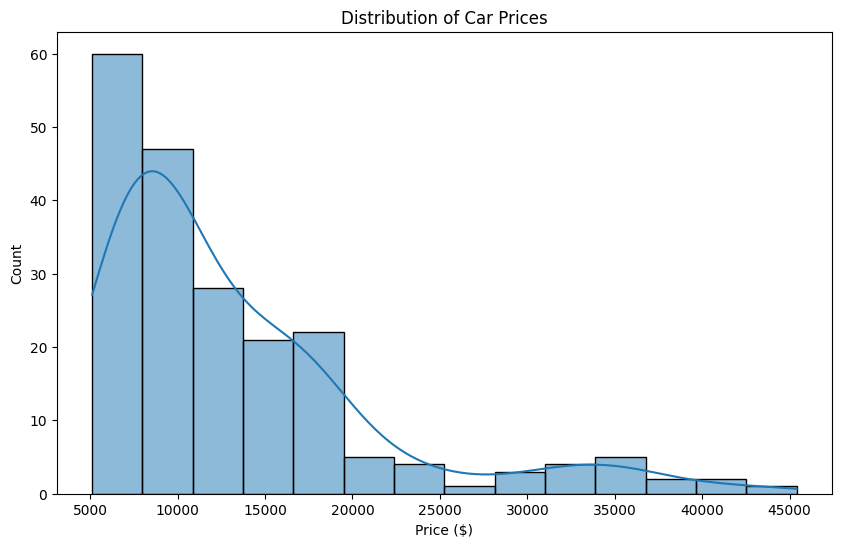

Most cars are between $5,000 and $20,000.


In [8]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Draw a histogram of prices
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.show()

print("Most cars are between $5,000 and $20,000.")

4) Preparing Data for Machine Learning

In [ ]:
# 1. Separate the target (Price) from the features
X = df.drop('price', axis=1)  # Everything except price
y = df['price']               # Only price

# 2. Tell the computer which columns are numbers and which are text
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# 3. Create a transformer
# Standard scaler makes all numbers comparable
# OneHotEncoder turns text into 0s and 1s
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# 4. Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data is ready for training!")

Data is ready for training!


5) Training and Comparing Models

In [ ]:
# Model 1: Linear Regression (Simple)
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)
print("Linear Regression trained.")

# Model 2: Random Forest (Smart) 
# Random Forest uses many decision trees to make a better guess
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
print("Random Forest trained.")

Linear Regression trained.
Random Forest trained.


6) Checking the Results

In [11]:
# Make predictions
pred_lr = lr_model.predict(X_test)
pred_rf = rf_model.predict(X_test)

# Function to print score nicely
def print_score(name, y_true, y_pred):
    error = mean_absolute_error(y_true, y_pred)
    accuracy = r2_score(y_true, y_pred)
    print(f"--- {name} ---")
    print(f"Average Error: ${error:.2f}")
    print(f"Accuracy Score: {accuracy:.2f}") # 1.0 is perfect
    print("\n")

# Show results
print_score("Linear Regression", y_test, pred_lr)
print_score("Random Forest", y_test, pred_rf)

--- Linear Regression ---
Average Error: $1799.22
Accuracy Score: 0.90


--- Random Forest ---
Average Error: $1297.48
Accuracy Score: 0.96




7) See the Difference visually

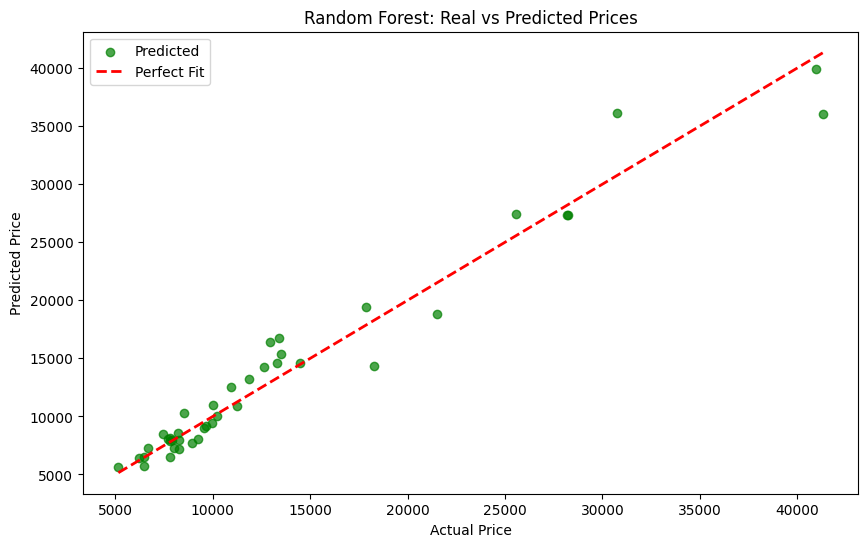

In [12]:
plt.figure(figsize=(10, 6))

# Plot the Random Forest predictions
plt.scatter(y_test, pred_rf, alpha=0.7, color='green', label='Predicted')

# Plot the perfect line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Real vs Predicted Prices')
plt.legend()
plt.show()